In [1]:
import numpy as np
import os
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
estimates = [
    ["cov", "sample", "Sample"],
    ["cov", "shrinkage_Sii", "Covariance shrinkage with $\mathbf{T}^{(1)}$"],
    ["cov", "shrinkage_P", "Covariance shrinkage with $\mathbf{T}^{(2)}$"],
    ["cov", "NERCOME", "NERCOME"],
]
#estimates = [
#    ["pre", "shrinkage_inv_then_diag", "Precision shrinkage with $\mathbf{\Pi}_0^{(1)}$"],
#    ["pre", "shrinkage_diag_then_inv", "Precision shrinkage with $\mathbf{\Pi}_0^{(2)}$"],
#    ["pre", "shrinkage_P", "Precision shrinkage with $\mathbf{\Pi}_0^{(3)}$"],
#]
n = 21

In [3]:
mat_path = "../output/BOSS_DR12_NGC_z1/matrices/"
C_ref = np.loadtxt(os.path.join(mat_path, "n2048/cov_sample/cov_18_18_sample_2048_v1.matrix"))
Cinv_ref = np.linalg.inv(C_ref) * (2048-18-2)/(2048-1)

emodes = np.linspace(1, 18, 18)
evals_ref = np.linalg.eigvalsh(Cinv_ref)

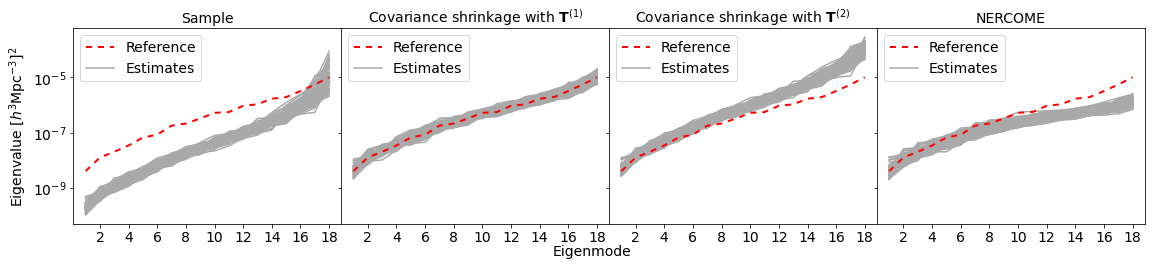

In [30]:
nplots = len(estimates)
fig, axs = plt.subplots(1, nplots, sharey=True)
fig.subplots_adjust(wspace=0)
fig.set_size_inches(4.8*nplots, 3.6)

for k, estimate in enumerate(estimates):
    mat_type = estimate[0]
    est_type = estimate[1]
    plt_title = estimate[2]
    
    axs[k].plot(emodes, evals_ref, c="red", ls="-", dashes=(3,3), linewidth=2, zorder=10, label="Reference")

    data_path = os.path.join(mat_path, f"n{n}/{mat_type}_{est_type}/")
    filenames = [f for f in os.listdir(data_path) if not f.startswith('.')]
    
    for filename in filenames:
        matrix = np.loadtxt(os.path.join(data_path, filename))
    
        if mat_type == "cov":
            # Obtain precision matrix
            Cinv = np.linalg.inv(matrix)
            if est_type == "sample":
                # Apply Hartlap correction
                H = (n-18-2) / (n-1)
                Cinv = H*Cinv
            
        elif mat_type == "pre":
            # The matrix is already the precision matrix
            Cinv = matrix
        
        evals = np.linalg.eigvalsh(Cinv)
        curve = axs[k].plot(emodes, evals, c='darkgrey', zorder=1)
    
    curve[0].set_label("Estimates")
    
    xticks = np.linspace(2, 18, 9)
    axs[k].set_title(plt_title, fontsize=14)
    axs[k].set_yscale("log")
    axs[k].legend(loc="upper left", fontsize=14)
    axs[k].set_xticks(xticks)
    axs[k].tick_params(axis='both', which='major', labelsize=14)

axs[0].set_ylabel(r"Eigenvalue $[h^3 \rm{Mpc}^{-3}]^2$", fontsize=14)
fig.supxlabel("Eigenmode", fontsize=14, y=-0.01)

#fig.savefig(f"../output/BOSS_DR12_NGC_z1/plots/eigenspectra_1_{n}.eps", format="eps", bbox_inches='tight', pad_inches = 0.1)
plt.show()

In [441]:
print(f"Computed from {n} mocks:")
for k, estimate in enumerate(estimates):
    mat_type = estimate[0]
    est_type = estimate[1]
    plt_title = estimate[2]
    
    data_path = os.path.join(mat_path, f"n{n}/{mat_type}_{est_type}/")
    filenames = [f for f in os.listdir(data_path) if not f.startswith('.')]
    
    ds = []
    for filename in filenames:
        matrix = np.loadtxt(os.path.join(data_path, filename))
        
        if mat_type == "cov":
            # Obtain precision matrix
            Cinv = np.linalg.inv(matrix)
            if est_type == "sample":
                # Apply Hartlap correction
                H = (n-18-2) / (n-1)
                Cinv = H*Cinv
            
        elif mat_type == "pre":
            # The matrix is already the precision matrix
            Cinv = matrix
        
        Cinv_sqrt = linalg.sqrtm(Cinv)
        M = Cinv_sqrt @ C_ref @ Cinv_sqrt
        diff = M - np.diag(np.ones(18))
        d = np.sqrt(np.abs(np.trace(diff@diff.T)))
        ds.append(d)
    
    d_med = np.median(ds)
    d_16, d_84 = np.quantile(ds, [0.16, 0.84])
    print(plt_title)
    print(f"{d_med}")
    print(f"[{d_16}, {d_84}]\n")

Computed from 2048 mocks:
Sample
0.039379664413889647
[0.039379664413889647, 0.039379664413889647]

Covariance shrinkage with $\mathbf{T}^{(1)}$
0.04846801537784608
[0.04846801537784608, 0.04846801537784608]

Covariance shrinkage with $\mathbf{T}^{(2)}$
0.00826751525441998
[0.00826751525441998, 0.00826751525441998]

NERCOME
0.07345055206150192
[0.07345055206150192, 0.07345055206150192]

Precision shrinkage with $\mathbf{\Pi}_0^{(1)}$
0.07192807962150807
[0.07192807962150807, 0.07192807962150807]

Precision shrinkage with $\mathbf{\Pi}_0^{(2)}$
0.07132418063479055
[0.07132418063479055, 0.07132418063479055]

Precision shrinkage with $\mathbf{\Pi}_0^{(3)}$
0.038179939282572614
[0.038179939282572614, 0.038179939282572614]



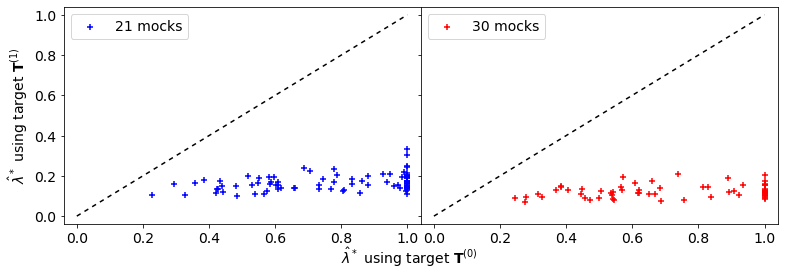

In [39]:
l_S_21 = np.loadtxt(os.path.join(mat_path, "n21", "lambdas_Sii_21.dat"))
l_P_21 = np.loadtxt(os.path.join(mat_path, "n21", "lambdas_P_21.dat"))
l_S_30 = np.loadtxt(os.path.join(mat_path, "n30", "lambdas_Sii_30.dat"))
l_P_30 = np.loadtxt(os.path.join(mat_path, "n30", "lambdas_P_30.dat"))

fig, axs = plt.subplots(1, 2, sharey=True)
fig.subplots_adjust(wspace=0)
fig.set_size_inches(12.8, 4)

xs = ys = np.linspace(0, 1, 100)

axs[0].scatter(l_S_21, l_P_21, c="blue", marker="+", label="21 mocks")
axs[0].plot(xs, ys, ls="-", dashes=(3,3), c="black")
axs[0].legend(fontsize=14)
axs[0].set_xlim([-0.04, 1.04])
axs[0].set_ylim([-0.04, 1.04])
axs[0].set_ylabel(r"$\hat{\lambda}^*$ using target $\mathbf{T}^{(1)}$", fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=14)

axs[1].scatter(l_S_30, l_P_30, c="red", marker="+", label="30 mocks")
axs[1].plot(xs, ys, ls="-", dashes=(3,3), c="black")
axs[1].legend(fontsize=14)
axs[1].set_xlim([-0.04, 1.04])
axs[1].tick_params(axis='both', which='major', labelsize=14)

fig.supxlabel(r"$\hat{\lambda}^*$ using target $\mathbf{T}^{(0)}$", fontsize=14, y=-0.03)

#fig.savefig("../output/lambdas.eps", format="eps", bbox_inches='tight', pad_inches = 0.1)
plt.show()

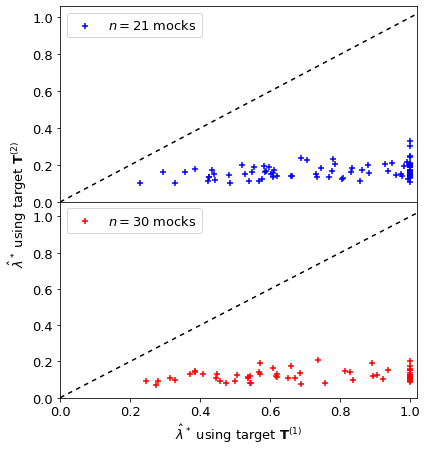

In [18]:
l_S_21 = np.loadtxt(os.path.join(mat_path, "n21", "lambdas_Sii_21.dat"))
l_P_21 = np.loadtxt(os.path.join(mat_path, "n21", "lambdas_P_21.dat"))
l_S_30 = np.loadtxt(os.path.join(mat_path, "n30", "lambdas_Sii_30.dat"))
l_P_30 = np.loadtxt(os.path.join(mat_path, "n30", "lambdas_P_30.dat"))

fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)
fig.set_size_inches(6.4, 7.2)

xs = ys = np.linspace(0, 1.1, 100)

axs[0].scatter(l_S_21, l_P_21, c="blue", marker="+", label="$n=21$ mocks")
axs[0].plot(xs, ys, ls="-", dashes=(3,3), c="black")
axs[0].legend(fontsize=13)
axs[0].set_xlim([0.0, 1.02])
axs[0].set_ylim([0.0, 1.06])
axs[0].tick_params(axis='both', which='major', labelsize=13)

axs[1].scatter(l_S_30, l_P_30, c="red", marker="+", label="$n=30$ mocks")
axs[1].plot(xs, ys, ls="-", dashes=(3,3), c="black")
axs[1].legend(fontsize=13)
axs[1].set_ylim([0.0, 1.08])
axs[1].set_xlabel(r"$\hat{\lambda}^*$ using target $\mathbf{T}^{(1)}$", fontsize=13)
axs[1].tick_params(axis='both', which='major', labelsize=13)

fig.supylabel(r"$\hat{\lambda}^*$ using target $\mathbf{T}^{(2)}$", fontsize=13, x=0.01)

#fig.savefig("../output/BOSS_DR12_NGC_z1/plots/lambdas.eps", format="eps", bbox_inches='tight', pad_inches = 0.1)
plt.show()

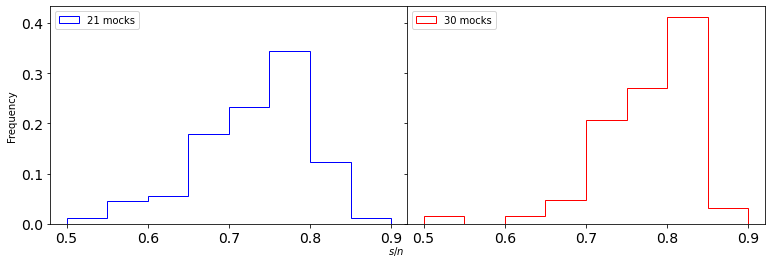

In [50]:
ss_min_21 = np.loadtxt(os.path.join(mat_path, "n21", "ss_min_21.dat"))
ss_min_30 = np.loadtxt(os.path.join(mat_path, "n30", "ss_min_30.dat"))

fig, axs = plt.subplots(1, 2, sharey=True)
fig.subplots_adjust(wspace=0)
fig.set_size_inches(12.8, 4)

bins=np.linspace(0.5, 0.9, 9)

axs[0].hist(ss_min_21/21, bins=bins, color="blue", histtype="step", label="21 mocks", weights=np.ones_like(ss_min_21) / len(ss_min_21))
axs[0].legend(loc="upper left")
axs[0].set_ylabel("Frequency")

axs[1].hist(ss_min_30/30, bins=bins, color="red", histtype="step", label="30 mocks", weights=np.ones_like(ss_min_30) / len(ss_min_30))
axs[1].legend(loc="upper left")

#axs[1].set_xlabel(r"$s/n$")
fig.supxlabel(r"$s/n$", fontsize=10)

#fig.savefig("../output/ss_min.eps", format="eps", bbox_inches='tight', pad_inches = 0.1)
plt.show()

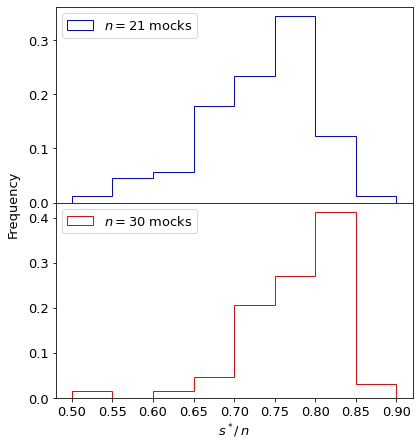

In [28]:
ss_min_21 = np.loadtxt(os.path.join(mat_path, "n21", "ss_min_21.dat"))
ss_min_30 = np.loadtxt(os.path.join(mat_path, "n30", "ss_min_30.dat"))

fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)
fig.set_size_inches(6.4, 7.2)

bins=np.linspace(0.5, 0.9, 9)

axs[0].hist(ss_min_21/21, bins=bins, color="blue", histtype="step", label="$n=21$ mocks", weights=np.ones_like(ss_min_21) / len(ss_min_21))
axs[0].legend(loc="upper left", fontsize=13)
axs[0].tick_params(axis='both', which='major', labelsize=13)

axs[1].hist(ss_min_30/30, bins=bins, color="red", histtype="step", label="$n=30$ mocks", weights=np.ones_like(ss_min_30) / len(ss_min_30))
axs[1].legend(loc="upper left", fontsize=13)
axs[1].tick_params(axis='both', which='major', labelsize=13)

axs[1].set_xlabel(r"$s^* /\, n$", fontsize=13)
fig.supylabel("Frequency", fontsize=13)

#fig.savefig("../output/BOSS_DR12_NGC_z1/plots/ss_min.eps", format="eps", bbox_inches='tight', pad_inches = 0.1)
plt.show()

In [4]:
a_inv_then_diag_21 = np.loadtxt(os.path.join(mat_path, "n21", "alphas_inv_then_diag_21.dat"))
b_inv_then_diag_21 = np.loadtxt(os.path.join(mat_path, "n21", "betas_inv_then_diag_21.dat"))
a_diag_then_inv_21 = np.loadtxt(os.path.join(mat_path, "n21", "alphas_diag_then_inv_21.dat"))
b_diag_then_inv_21 = np.loadtxt(os.path.join(mat_path, "n21", "betas_diag_then_inv_21.dat"))
a_P_21 = np.loadtxt(os.path.join(mat_path, "n21", "alphas_P_21.dat"))
b_P_21 = np.loadtxt(os.path.join(mat_path, "n21", "betas_P_21.dat"))

a_inv_then_diag_30 = np.loadtxt(os.path.join(mat_path, "n30", "alphas_inv_then_diag_30.dat"))
b_inv_then_diag_30 = np.loadtxt(os.path.join(mat_path, "n30", "betas_inv_then_diag_30.dat"))
a_diag_then_inv_30 = np.loadtxt(os.path.join(mat_path, "n30", "alphas_diag_then_inv_30.dat"))
b_diag_then_inv_30 = np.loadtxt(os.path.join(mat_path, "n30", "betas_diag_then_inv_30.dat"))
a_P_30 = np.loadtxt(os.path.join(mat_path, "n30", "alphas_P_30.dat"))
b_P_30 = np.loadtxt(os.path.join(mat_path, "n30", "betas_P_30.dat"))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


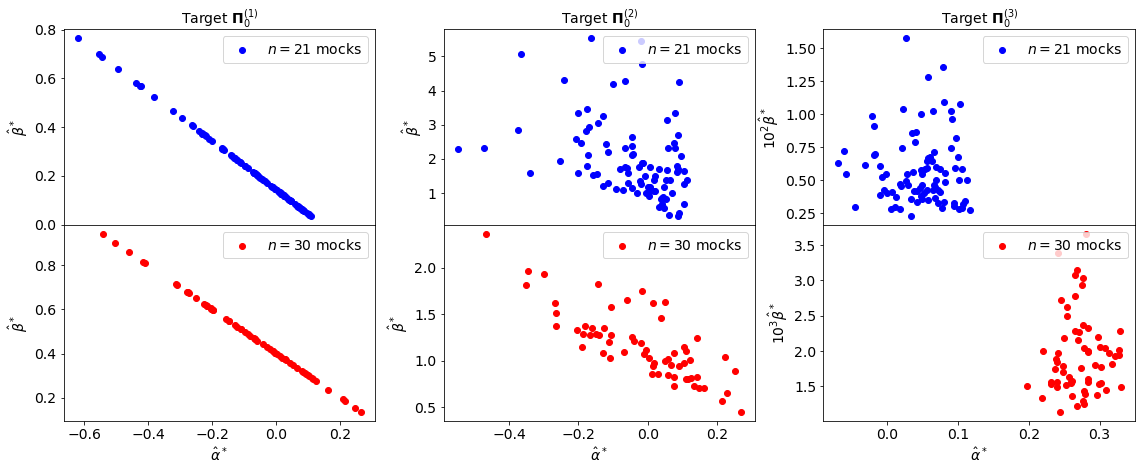

In [12]:
fig, axs = plt.subplots(2, 3, sharex="col")
fig.subplots_adjust(hspace=0, wspace=0.22)
fig.set_size_inches(19.2, 7.2)

axs[0,0].scatter(a_inv_then_diag_21, b_inv_then_diag_21, c="blue", label="$n=21$ mocks")
axs[0,0].set_title("Target $\mathbf{\Pi}_0^{(1)}$", fontsize=14)
axs[0,0].set_ylabel(r"$\hat{\beta}^*$", fontsize=14)
axs[0,0].legend(fontsize=14, loc="upper right")
axs[0,0].tick_params(axis='both', which='major', labelsize=14)

axs[1,0].scatter(a_inv_then_diag_30, b_inv_then_diag_30, c="red", label="$n=30$ mocks")
axs[1,0].set_xlabel(r"$\hat{\alpha}^*$", fontsize=14)
axs[1,0].set_ylabel(r"$\hat{\beta}^*$", fontsize=14)
axs[1,0].legend(fontsize=14, loc="upper right")
axs[1,0].tick_params(axis='both', which='major', labelsize=14)

axs[0,1].scatter(a_diag_then_inv_21, b_diag_then_inv_21, c="blue", label="$n=21$ mocks")
axs[0,1].set_title("Target $\mathbf{\Pi}_0^{(2)}$", fontsize=14)
axs[0,1].set_ylabel(r"$\hat{\beta}^*$", fontsize=14)
axs[0,1].legend(fontsize=14, loc="upper right")
axs[0,1].tick_params(axis='both', which='major', labelsize=14)

axs[1,1].scatter(a_diag_then_inv_30, b_diag_then_inv_30, c="red", label="$n=30$ mocks")
axs[1,1].set_xlabel(r"$\hat{\alpha}^*$", fontsize=14)
axs[1,1].set_ylabel(r"$\hat{\beta}^*$", fontsize=14)
axs[1,1].legend(fontsize=14, loc="upper right")
axs[1,1].tick_params(axis='both', which='major', labelsize=14)

axs[0,2].scatter(a_P_21, b_P_21*1e2, c="blue", label="$n=21$ mocks")
axs[0,2].set_title("Target $\mathbf{\Pi}_0^{(3)}$", fontsize=14)
axs[0,2].set_ylabel(r"$10^2\hat{\beta}^*$", fontsize=14)
axs[0,2].legend(fontsize=14, loc="upper right")
axs[0,2].tick_params(axis='both', which='major', labelsize=14)

axs[1,2].scatter(a_P_30, b_P_30*1e3, c="red", label="$n=30$ mocks")
axs[1,2].set_xlabel(r"$\hat{\alpha}^*$", fontsize=14)
axs[1,2].set_ylabel(r"$10^3\hat{\beta}^*$", fontsize=14)
axs[1,2].legend(fontsize=14, loc="upper right")
axs[1,2].tick_params(axis='both', which='major', labelsize=14)

#fig.savefig("../output/BOSS_DR12_NGC_z1/plots/pre_shrinkage_params.eps", format="eps", bbox_inches='tight', pad_inches = 0.1)
plt.show()